### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

'apt'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [31]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [2]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

* <b>마동석</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [9]:
query = '문재인'
#downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 15)

[Train Dataset] 1.jpg
[Train Dataset] 10.jpg
[Train Dataset] 11.jpg
[Train Dataset] 12.jpg
[Train Dataset] 13.jpg
[Train Dataset] 14.jpg
[Train Dataset] 15.jpg
[Train Dataset] 16.jpg
[Train Dataset] 17.jpg
[Train Dataset] 18.jpg
[Train Dataset] 19.jpg
[Train Dataset] 2.jpg
[Train Dataset] 20.jpeg
[Train Dataset] 3.jpg
[Train Dataset] 4.jpg
[Test Dataset] 5.jpg
[Test Dataset] 6.jpeg
[Test Dataset] 7.jpg
[Test Dataset] 8.jpg
[Test Dataset] 9.jpg


* <b>김종국</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [12]:
query = '박상훈'
dataset_split(query, 30)

[Train Dataset] 1.jpg
[Train Dataset] 101.jpg
[Train Dataset] 124.jpg
[Train Dataset] 129.jpg
[Train Dataset] 130.jpg
[Train Dataset] 131.jpg
[Train Dataset] 2.jpg
[Train Dataset] 21.jpg
[Train Dataset] 22.jpg
[Train Dataset] 3.jpg
[Train Dataset] 30.jpg
[Train Dataset] 31.jpg
[Train Dataset] 32.jpg
[Train Dataset] 33.jpg
[Train Dataset] 34.jpg
[Train Dataset] 39.jpg
[Train Dataset] 4.jpg
[Train Dataset] 40.jpg
[Train Dataset] 46.jpg
[Train Dataset] 5.jpg
[Train Dataset] 6.jpg
[Train Dataset] 63.jpg
[Train Dataset] 68.jpg
[Train Dataset] 7.jpg
[Train Dataset] 87.jpg
[Train Dataset] 94.jpg
[Train Dataset] 95.jpg
[Train Dataset] 96.jpg


In [13]:
query = '바이든'
downloader.download(query, limit=20,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 20 Images on Page 1.
#1 이미지 다운로드 (https://im-media.voltron.voanews.com/Drupal/01live-211/styles/sourced/s3/ap-images/2020/08/09f2ffd1ea852ddf27b1596f5e995b4b.jpg?itok=q_2qFGaI)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://58.234.158.21:8081/Upload/Image/20201107/00000000000000221462.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://newsroom.etomato.com/userfiles/조바이든.jpg)
[Info] Issue getting: http://newsroom.etomato.com/userfiles/조바이든.jpg
[Error] 'ascii' codec can't encode characters in position 15-18: ordinal not in range(128)
#3 이미지 다운로드 (https://www.ntoday.co.kr/news/photo/202009/74903_47929_5939.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://image.imnews.imbc.com/news/2020/world/article/__icsFiles/afieldfile/2020/09/21/p20200919_64.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://blog.kakaocdn.net/dn/4WIZT/btqEm27PwwR/lHkXBiVjzsxKKNkIdSseb0/img.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2020/07/19/fe60ae39

In [14]:
query = '아이유'
downloader.download(query, limit=20,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 20 Images on Page 1.
#1 이미지 다운로드 (https://data.ygosu.com/upload_files/board_love/172484/5d885def0c037.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://image.winudf.com/v2/image/Y29tLmNvZ3VscGxhbmV0LnRoZW1lLmtha2FvLnRhbGsudG9wc3Rhcm5ld3MudG9wc3Rhcm5ld3Nsb3ZlbHlpdV9zY3JlZW5fMF8xNTI4Mjg3MzM3XzA3Mw/screen-0.jpg?fakeurl=1&amp;type=.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.etoday.co.kr/pto_db/2017/12/20171203154011_1159560_600_750.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://cdn.dealbada.com/restapi/image/resizeWidth/1080/data/editor/2101/71c3f7024491c14ac6f1adefe9fdb4ea_1611480154_1117.jpeg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://dvdprime.com/g2/data/file/comm/view_thumbnail/mania-done-1603427276_QI3WrupH_1.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://image.fmkorea.com/files/attach/new/20200406/486616/145591984/2858891953/283ebc14da85cded2249e5d42c5f38f0.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://idolworld.co.kr/data/file/girl_iu/102

In [15]:
query = '안철수'
downloader.download(query, limit=35,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://file.mk.co.kr/meet/yonhap/2022/02/08/image_readtop_2022_112121_0_050111.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://file.mk.co.kr/meet/yonhap/2022/05/09/image_readtop_2022_405854_0_093511.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://archivenew.vop.co.kr/images/206103ec62045d2e5d81e5cc3fb3a9c2/2022-05/1651991744_xTHju4yg_570.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img.insight.co.kr/static/2022/05/12/1200/059y9106f4v5vki23l71.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202205/09/Channela/20220509195154593cfto.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202205/13/kukinews/20220513060212365gkir.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://image.kmib.co.kr/online_image/2022/0504/2022050415584787140_1651647527_0017044643.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 

In [16]:
query = '오바마'
downloader.download(query, limit=20,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 20 Images on Page 1.
#1 이미지 다운로드 (https://miro.medium.com/max/1024/1*nUYhl8VRdDa-lnx-vZNlEA.jpeg)
[Error] Invalid image, not saving https://miro.medium.com/max/1024/1*nUYhl8VRdDa-lnx-vZNlEA.jpeg
[Info] Issue getting: https://miro.medium.com/max/1024/1*nUYhl8VRdDa-lnx-vZNlEA.jpeg
[Error] No active exception to reraise
#1 이미지 다운로드 (http://image.chosun.com/sitedata/image/201706/05/2017060500198_0.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://im-media.voltron.voanews.com/Drupal/01live-211/styles/sourced/s3/2019-09/C3B996F9-9B35-4291-BC1B-C54C4761A048.jpg?itok=7u5Dq9uu)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://news.kbs.co.kr/data/news/2018/09/08/4035737_MCN.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://im-media.voltron.voanews.com/Drupal/01live-211/styles/sourced/s3/2019-09/32F40F41-81DB-4D52-84CF-1CBE35F53144.jpg?itok=ICBN2A4n)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img.insight.co.kr/static/2016/11/24/2000/9f5o7dw41o08c86h2mj0.jpg)
#5 파일 다운로드가 완료

In [10]:
# query = '김종국'
# downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
# dataset_split(query, 30)

* <b>이병헌</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [2]:
# query = '이병헌'
# downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
# dataset_split(query, 30)

NameError: name 'transforms' is not defined

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

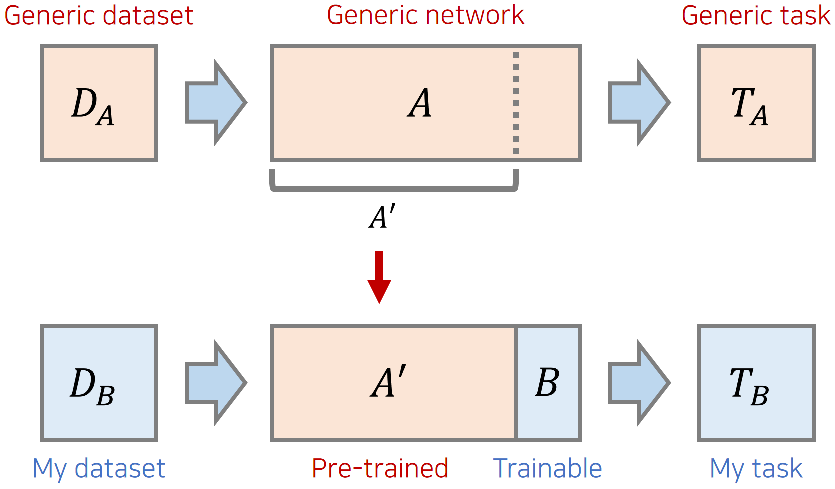

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [4]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=9, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=9, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 281
테스트 데이터셋 크기: 87
클래스: ['김종국', '마동석', '문재인', '바이든', '박상훈', '아이유', '안철수', '오바마', '윤석열', '이병헌']


* 간단히 이미지를 시각화해 봅시다.

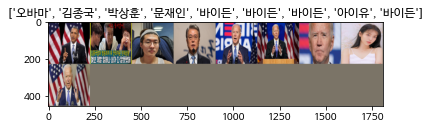

In [5]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# # 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# # 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [11]:
#model = torch.load()
model.load_state_dict(torch.load("C://coding//face2//dataset//train//cnn_model_2.pt"))

In [10]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 11)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

AttributeError: 'collections.OrderedDict' object has no attribute 'parameters'

In [127]:
print(num_features)

512


* 학습을 진행합니다.

In [128]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 2.1036 Acc: 29.1815% Time: 40.6584s
#1 Loss: 0.8814 Acc: 77.2242% Time: 82.1369s
#2 Loss: 0.4885 Acc: 89.3238% Time: 122.7085s
#3 Loss: 0.3193 Acc: 92.1708% Time: 164.6314s
#4 Loss: 0.1765 Acc: 97.8648% Time: 207.0528s
#5 Loss: 0.1288 Acc: 99.2883% Time: 252.7202s
#6 Loss: 0.1001 Acc: 98.5765% Time: 295.1039s
#7 Loss: 0.0755 Acc: 99.2883% Time: 340.6356s
#8 Loss: 0.0479 Acc: 99.2883% Time: 385.9911s
#9 Loss: 0.0551 Acc: 99.2883% Time: 434.8455s
#10 Loss: 0.0385 Acc: 100.0000% Time: 479.3500s
#11 Loss: 0.0364 Acc: 100.0000% Time: 523.5978s
#12 Loss: 0.0470 Acc: 99.6441% Time: 568.5159s
#13 Loss: 0.0411 Acc: 99.2883% Time: 611.9049s
#14 Loss: 0.0255 Acc: 100.0000% Time: 658.0189s
#15 Loss: 0.0230 Acc: 100.0000% Time: 702.1578s
#16 Loss: 0.0253 Acc: 100.0000% Time: 746.5988s
#17 Loss: 0.0327 Acc: 99.6441% Time: 790.7865s
#18 Loss: 0.0234 Acc: 100.0000% Time: 835.2991s
#19 Loss: 0.0175 Acc: 100.0000% Time: 880.3418s
#20 Loss: 0.0297 Acc: 99.2883% Time: 924.8605s
#21 Loss: 0.0368 A

* 모델 저장

In [133]:
model_path = "C://coding//face2//dataset//train//cnn_model_2.yml"
torch.save(model.state_dict(), model_path)

* 학습된 모델을 평가합니다.

In [13]:
#model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

TypeError: 'collections.OrderedDict' object is not callable

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [45]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [46]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.jpg'

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [47]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

     ---------------------------------------- 95.2/95.2 KB 5.7 MB/s eta 0:00:00
     -------------------------------------- 224.9/224.9 KB 6.9 MB/s eta 0:00:00


In [48]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

In [49]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)


 * Running on http://760d-221-160-181-4.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.